### 특징

+ Keras와 즉시 실행(eager exexutuin)을 이용한 쉬운 모델 작성
+ 어떤 플랫폼에서든 튼튼한(robust) 모델을 배포
+ 연구를 위한 강력한 실험법
+ deprecated된 API를 정리하고 중복을 줄여서 API 단순화

### API

+ tf.data
+ tf.keras

In [1]:
#!pip install tensorflow
import tensorflow as tf

In [2]:
print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


In [3]:
a = tf.constant(10)
print(a + 5)
print(a.numpy())

tf.Tensor(15, shape=(), dtype=int32)
10


In [4]:
b = tf.constant("hello world")
print(b)
print(b.numpy())
print(type(b))
print(type(b.numpy()))

tf.Tensor(b'hello world', shape=(), dtype=string)
b'hello world'
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'bytes'>


In [5]:
c = tf.constant("안녕하세요")
print(c)
print(c.numpy().decode("utf-8"))

tf.Tensor(b'\xec\x95\x88\xeb\x85\x95\xed\x95\x98\xec\x84\xb8\xec\x9a\x94', shape=(), dtype=string)
안녕하세요


#### 다

In [6]:
# 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수(평균제곱오차(MSE))
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사하강 알고리즘(Gradient Descent) 
gradient = tf.reduce_mean((hypot - y_train) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient) 
update = W.assign(descent) ## W = descent

########## Graph 작업 완료 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)
    
sess.close()

AttributeError: module 'tensorflow' has no attribute 'random_normal'

In [26]:
# 텐서플로우2 버전
x_train = [1, 2, 3]
y_train = [1, 2, 3]

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(1, input_dim=1))  # 레이어 생성(~기설 준비)
sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss="mse", optimizer=sgd)
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 8ms/step - loss: 16.7735
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 13.2729
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 10.5058
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 8.3185
Epoch 5/20
1/1 [==============================] - 0s 4ms/step - loss: 6.5894
Epoch 6/20
1/1 [==============================] - 0s 7ms/step - loss: 5.2227
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 4.1422
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 3.2882
Epoch 9/20
1/1 [==============================] - 0s 4ms/step - loss: 2.6130
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 2.0792
Epoch 11/20
1/1 [==============================] - 0s 4ms/step - loss: 1.6572
Epoch 12/20
1/1 [==============================] - 0s 7ms/step - loss: 1.3236
Epoch 13/20
1/1 [==============================] - 0s 4ms/step - loss:

In [27]:
# 가중치 출력
print(model.weights)

# 결과값 출력
print(model.weights[0].numpy() * x_train[0] + model.weights[1].numpy())
print(model.weights[0].numpy() * x_train[1] + model.weights[1].numpy())
print(model.weights[0].numpy() * x_train[2] + model.weights[1].numpy())

[<tf.Variable 'dense_6/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.55580086]], dtype=float32)>, <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([0.59939724], dtype=float32)>]
[[1.1551981]]
[[1.710999]]
[[2.2667997]]


### Fashion MNIST Dataset(Hands-on, p.371)

In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from tensorflow import keras

In [9]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

#### 1. 데이터 준비

In [95]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [96]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


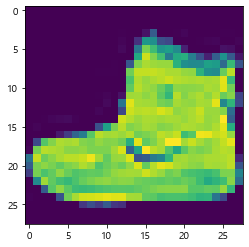

In [97]:
plt.imshow(X_train[0])

In [98]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", 
               "Bag", "Ankle boot"]

In [99]:
class_names[y_train[0]]

'Ankle boot'

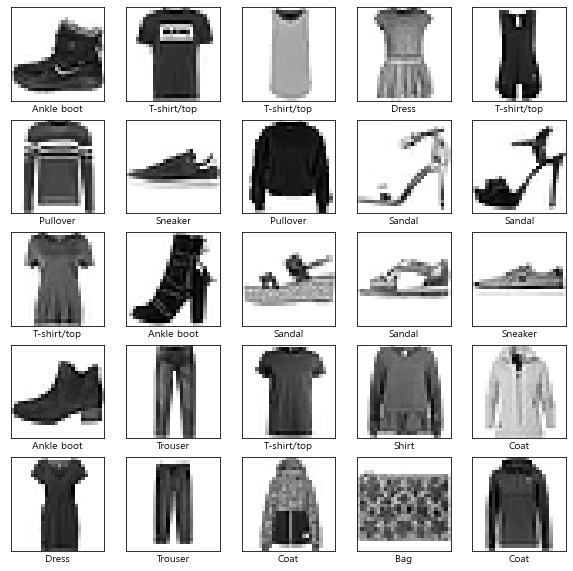

In [100]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

##### 2. 모델 구축 및 훈련

In [93]:
model1 = keras.models.Sequential()

model1.add(Dense(units=784, input_shape=[28, 28]))

model1.add(Dense(units=784, activation="relu"))
model1.add(Dense(units=784, activation="relu"))
model1.add(Dense(units=784, activation="relu"))
model1.add(Dense(units=784, activation="relu"))

model1.add(keras.layers.Dropout(0.4))

model1.add(Dense(units=10, activation="softmax"))

model1.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
#model1.summary()

model1.fit(X_train, y_train, epochs=30, batch_size=50)

Epoch 1/30


ValueError: in user code:

    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (50, 1) and (50, 28, 10) are incompatible


##### 3. 정확도 평가

In [113]:
loss, acc = model1.evaluate(X_test, y_test, verbose=2)

ValueError: in user code:

    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1230 test_function  *
        outputs = step_function(self, iterator)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        return step_function(self, iterator)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        if isinstance(reduce_op, six.string_types):
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs, self.distribute_strategy, reduction='first')
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1185 test_step
        This method can be overridden to support custom evaluation logic.
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        sw = apply_mask(y_p, sw, get_mask(y_p))
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        config = {}
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        
    C:\Users\cecil\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 28, 10) are incompatible


##### 4. 예측

In [106]:
pred = model1.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x000001DD60112880>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x000001DD60112880>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [107]:
pred[0]

array([[1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01],
       [1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01],
       [1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01],
       [1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01],
       [1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
        1.00000001e-01, 1.00000001e-01],
       [1.00000001e-01, 1.00000001e-01, 1.00000001e-01, 1.00000001e-01,
   

In [108]:
print(np.argmax(pred[0]))
print(y_test[0])

200
9


##### 함수버전

In [ ]:
# 함수
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                         100*np.max(predictions_array), 
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, pred, y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_array(i, pred, y_test)

In [ ]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, pred, y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_array(i, pred, y_test)

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, y_test)

In [ ]:
img = X_test[1234]
print(img.shape)

img = (np.expand_dims(img, 0))
#img = (np.reshape(img, (1, 28, 28)))
print(img.shape)

pred_single = model1.predict(img)
print(pred_single)

plot_value_array(0, pred_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

### Custom Churn Modeling

In [53]:
df = pd.read_csv("data/Customer_Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# CNN으로 확인 Dense를 몇개 쓸건지~ 정해서 해보기

##### 1. 전처리

+ 독립변수, 종속변수 분리
+ 문자 데이터 수치화
+ 스케일링

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis=1)
y= df['Exited']

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X['Geograpy'] = label.fit_transform(X['Geography'])

#label1 = LabelEncoder()
#X['Gender'] = label1.fit_trainsform(X['Geography'])

label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])

X = pd.get_dummies(X, drop_first=True, columns=['Geography']) 

# 스케일링
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##### 2. 모델 구축 및 훈련

In [58]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(X.shape[1], activation='relu', input_dim=X.shape[1]))

model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=["accuracy"])

model.fit(X_train, y_train.to_numpy(), epochs=10, batch_size=10, verbose=1)

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4485 - accuracy: 0.8071
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4013 - accuracy: 0.8298
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3649 - accuracy: 0.8489
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3476 - accuracy: 0.8571
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3399 - accuracy: 0.8589
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3370 - accuracy: 0.8616
Epoch 7/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3338 - accuracy: 0.8633
Epoch 8/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3303 - accuracy: 0.8630
Epoch 9/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3285 - accuracy: 0.8645
Epoch 10/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3239 - accuracy: 0.8630

##### 3. 성능 평가

In [63]:
y_pred = model.predict_classes(X_test)
model.evaluate(X_test, y_test.to_numpy(y_test))

63/63 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8540


[0.35555195808410645, 0.8539999723434448]